In [12]:
# some packages used in this example
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

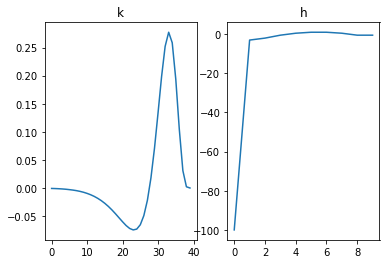

In [13]:
###########################################################################
## 1. Generating spikes from LNP model
###########################################################################

# params

# linear filter
k=np.loadtxt('k.txt')
#k = [-0.0008,   -0.0010,   -0.0013,   -0.0017,   -0.0022,   -0.0029,   -0.0037,   -0.0047,   -0.0060,   -0.0076,   -0.0096,   -0.0120,
#     -0.0149,   -0.0184,   -0.0225,   -0.0273,   -0.0328,   -0.0390,   -0.0458,   -0.0530,   -0.0601,   -0.0668,   -0.0720,   -0.0746,  
#     -0.0731,   -0.0654,   -0.0491,   -0.0219,    0.0180,    0.0708,    0.1335,    0.1983,    0.2520,    0.2772,    0.2585,    0.1937, 
#     0.1041,    0.0309,    0.0022,         0]

# history filter
h=np.loadtxt('h.txt')
#h = [ -100.0000,  -3.0000,   -2.0000,   -0.5000,    0.5000,    1.0000,    1.0000,    0.5000,   -0.5000,   -0.5000]

# bias term
b = -3

# plot filters
plt.subplot(121)
plt.plot(k)
plt.title('k')
plt.subplot(122)
plt.plot(h)
plt.title('h')

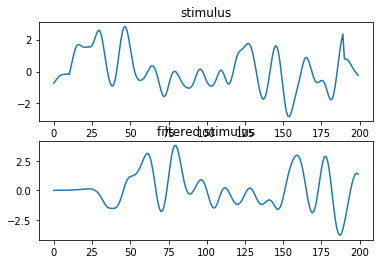

In [14]:
# load sample stimulus
Stim=np.loadtxt('Stim1.txt')

#from scipy.io import loadmat
#Stim1=loadmat('Stim1.mat')
#import h5py
#with h5py.File('Stim1.mat', 'r') as file:
#    Stim = list(file['Stim1'])[0]
#print(Stim2)  
#np.savetxt("Stim1.txt",Stim)


# Step 1. apply linear filter 
from scipy import signal
Sfilt = signal.lfilter(k, 1, Stim)

# plot stimulus and filtered stimulus
plt.subplot(211)
plt.plot(Stim)
plt.title('stimulus')
plt.subplot(212)
plt.plot(Sfilt)
plt.title('filtered stimulus')



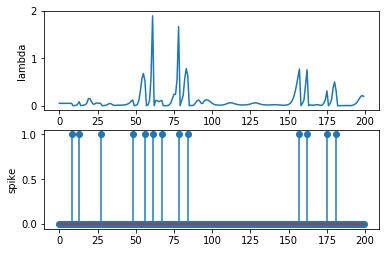

In [15]:
# Step 2. Generate a sequence of spikes
T = len(Sfilt)
spikeCnt = np.zeros((T,1))
lam = np.zeros((T,1))
H = len(h)
yhist = np.zeros((H,1))
dt = 0.5

for t in range(T):
    lam[t] = np.exp(Sfilt[t]+ np.dot(h,yhist)+b)
    p = lam[t] *dt    # probability of spike
    
    spikeCnt[t] = np.random.rand() < p

    # store history
    yhist[1:] =  yhist[:-1]
    yhist[0] = spikeCnt[t]
    
plt.subplot(211)
plt.plot(lam)
plt.ylabel('lambda')
plt.subplot(212)
plt.stem(spikeCnt)
plt.ylabel('spike')
                      

In [16]:
## Make it to a function!
def genGLMrep(stim, k, h,b, dt, numRep=None):

    if numRep is None:
        numRep=1

    # Step 1. apply linear filter 
    from scipy import signal
    Sfilt = signal.lfilter(k, 1, Stim)

    # Step 2. generate spikeCnt
    
    T = len(Sfilt)
    spikeCnt = np.zeros((T,numRep))
    lam = np.zeros((T,numRep))
    H = len(h)
    yhist = np.zeros((H,1))
    #dt = 0.5

    for rep in range(numRep):
        for t in range(T):
            lam[t,rep] = np.exp(Sfilt[t]+ np.dot(h,yhist)+b)
            p = lam[t,rep] *dt    # probability of spike
    
            spikeCnt[t,rep] = np.random.rand() < p

            # store history
            yhist[1:] =  yhist[:-1]
            yhist[0] = spikeCnt[t,rep]

    return spikeCnt, lam, Sfilt
        

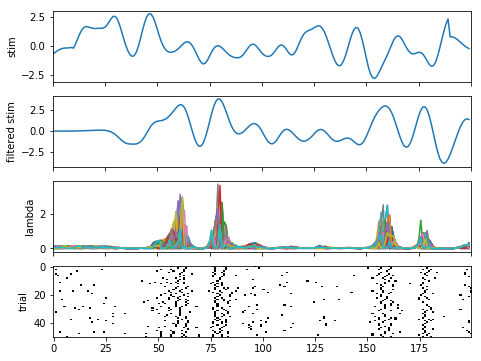

In [19]:
# generate 50 trials!

dt = 0.5
spikeCnt, lam, Sfilt = genGLMrep(Stim,k,h,b,dt,50)

T = len(spikeCnt)

plt.figure(figsize=(7.5,6))
plt.subplot(411)
plt.plot(Stim)
plt.xlim((0,T))
plt.ylabel('stim')
plt.gca().axes.xaxis.set_ticklabels([])

plt.subplot(412)
plt.plot(Sfilt)
plt.xlim((0,T))
plt.ylabel('filtered stim')
plt.gca().axes.xaxis.set_ticklabels([])

plt.subplot(413)
plt.plot(lam)
plt.xlim((0,T))
plt.ylabel('lambda')
plt.gca().axes.xaxis.set_ticklabels([])

plt.subplot(414)
if spikeCnt.shape[1] == 1:
    # single trial
    plt.stem(spikeCnt)    
    plt.xlim((0,T))
    plt.ylabel('spikes')
else:    
    # multiple trials
    plt.imshow(spikeCnt.T==0, cmap=plt.get_cmap('gray'), aspect='auto', interpolation='none')
    plt.ylabel('trial')

# save image
plt.savefig('spikes.pdf', dpi=300)
